In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# import evalution Libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve


**Exploring the Data:**

1.what problems i am going to solve?

2.what kind of data i have?

3.Does this data have missing value?

4.Are there any outliers,sporious vector

5.Can i add or remove some features?

In [ ]:
heasrt_disease = pd.read_csv('/content/heart-disease.csv')
heasrt_disease.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heasrt_disease.shape

(303, 14)

In [ ]:
heasrt_disease['target'].value_counts()

,count
target,
1,165
0,138


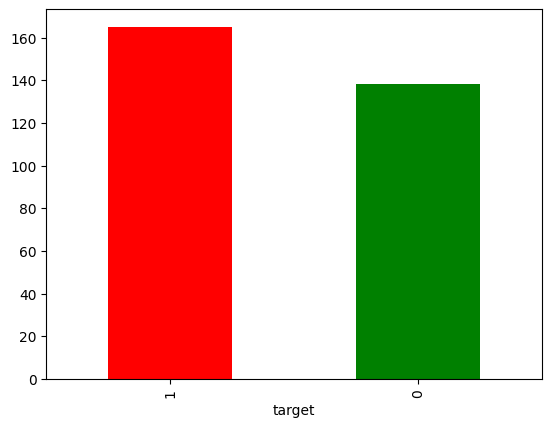

In [ ]:
heasrt_disease['target'].value_counts().plot(kind='bar',color=['red','green']);

In [ ]:
heasrt_disease.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heasrt_disease.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heasrt_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heasrt_disease['sex'].value_counts() # 1 show male and 0 show female

,count
sex,
1,207
0,96


In [ ]:
len(heasrt_disease)

303

In [ ]:
207/303  # total male

0.6831683168316832

In [ ]:
pd.crosstab(heasrt_disease.target,heasrt_disease.sex)

sex,0,1
target,,
0,24,114
1,72,93


In [ ]:
72/96 # women have disease

0.75

In [ ]:
24/96 # women have no disease


0.25

In [ ]:
93/207 # male have disease

0.4492753623188406

In [ ]:
114/207 # male have no disease

0.5507246376811594

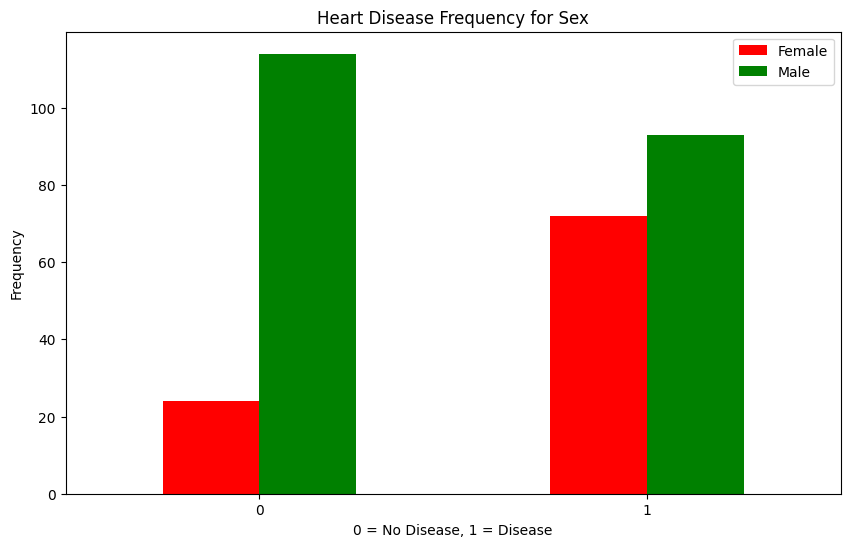

In [ ]:
pd.crosstab(heasrt_disease.target,heasrt_disease.sex).plot(kind='bar',
                                                           figsize=(10,6),
                                                           color=['red','green'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Female','Male'])
plt.xticks(rotation=0)
plt.show()

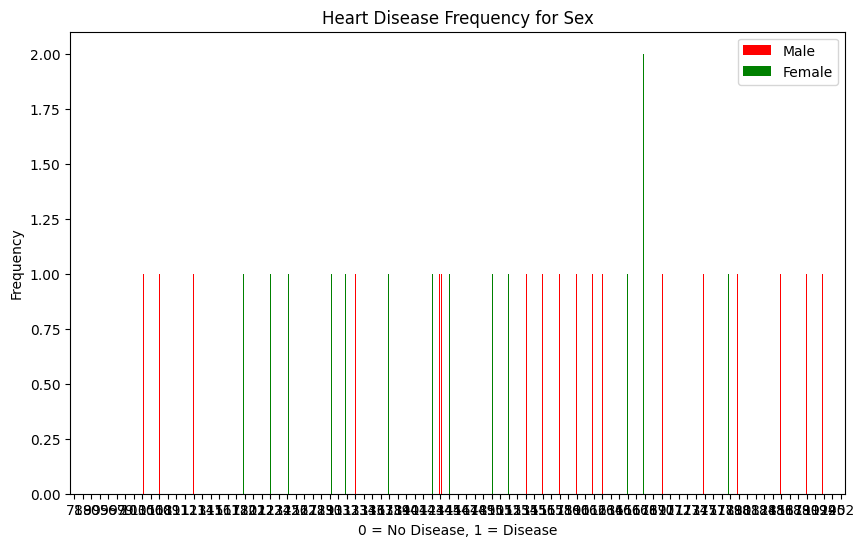

In [ ]:
# find pattern in data using scatter plot
pd.crosstab(heasrt_disease.thalach,heasrt_disease.age).plot(kind='bar',
                                                           figsize=(10,6),
                                                           color=['red','green'])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('0 = No Disease, 1 = Disease')
plt.ylabel('Frequency')
plt.legend(['Male','Female'])
plt.xticks(rotation=0)
plt.show()


In [ ]:
heasrt_disease.thalach.value_counts() # in thalach ,91 are different value
# therefore we can not sketch in bar graph so it is not good way

,count
thalach,
162,11
163,9
160,9
173,8
152,8
...,...
117,1
71,1
118,1


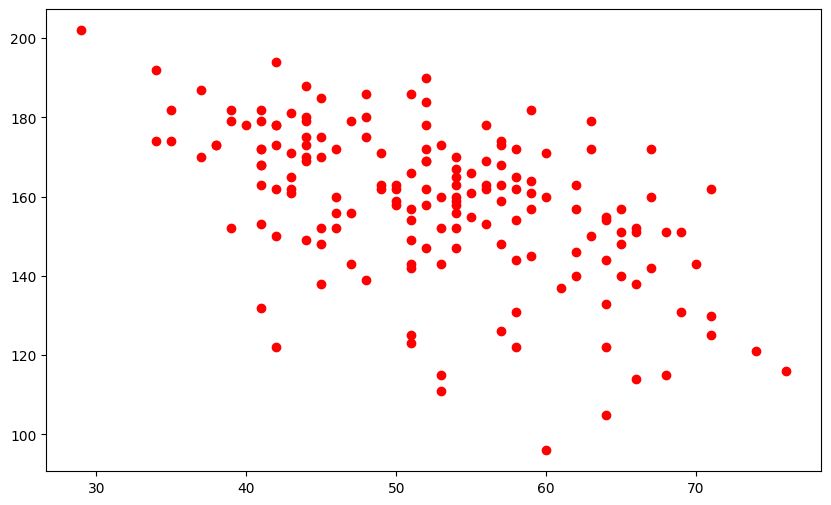

In [ ]:
# find pattern in data using scatter plot
plt.figure(figsize=(10, 6)) # Change the curly braces to parentheses for figsize
# those who have  disease ,the color is red
# relation btw age and thalach(maximum rate achieved) and those which have heart disease of age and thalach
plt.scatter(heasrt_disease.age[heasrt_disease.target==1], heasrt_disease.thalach[heasrt_disease.target==1], c='red'); # Corrected the variable name

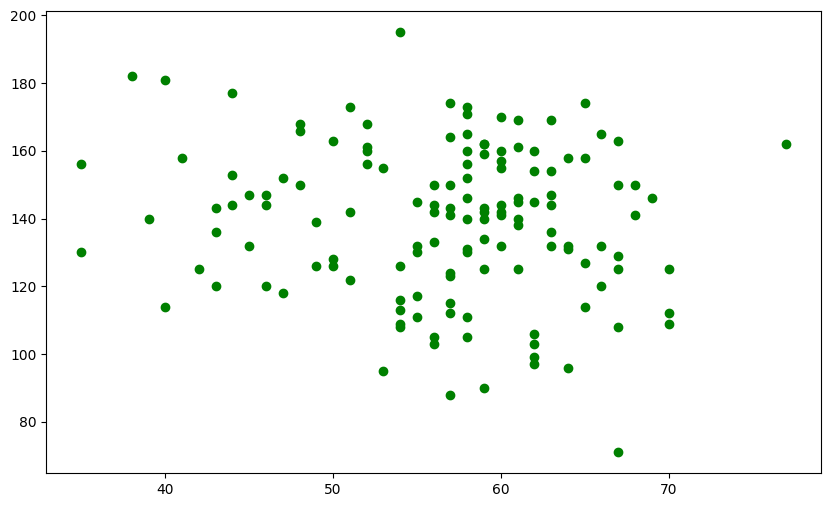

In [ ]:
# find pattern in data using scatter plot
plt.figure(figsize=(10, 6)) # Change the curly braces to parentheses for figsize
# those who have not disease ,the color is green
# relation btw age and thalach(maximum rate achieved) and those which have heart disease of age and thalach
plt.scatter(heasrt_disease.age[heasrt_disease.target==0], heasrt_disease.thalach[heasrt_disease.target==0], c='green'); # Corrected the variable name

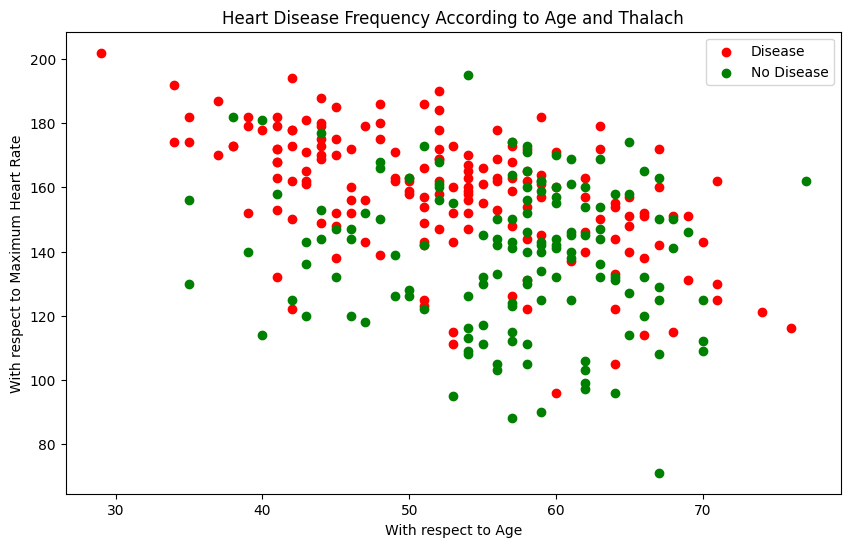

In [ ]:
plt.figure(figsize=(10, 6))
# those who have  disease ,the color is red
plt.scatter(heasrt_disease.age[heasrt_disease.target==1], heasrt_disease.thalach[heasrt_disease.target==1], c='red');
# those who have not disease ,the color is green
plt.scatter(heasrt_disease.age[heasrt_disease.target==0], heasrt_disease.thalach[heasrt_disease.target==0], c='green');
plt.xlabel("With respect to Age")
plt.ylabel("With respect to Maximum Heart Rate")
plt.title("Heart Disease Frequency According to Age and Thalach")
plt.legend(["Disease", "No Disease"])
plt.show()


<Axes: ylabel='Frequency'>

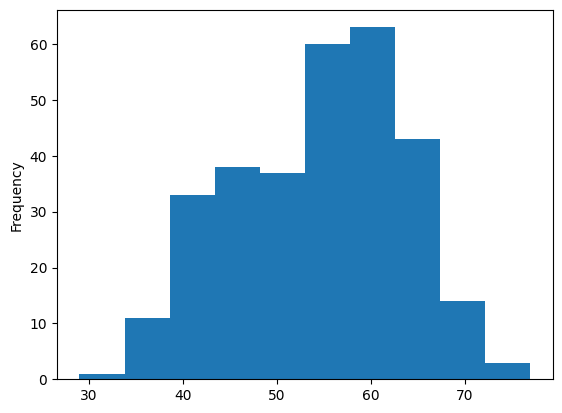

In [ ]:
# create histrogram to see age distribution
heasrt_disease.age.plot.hist()

**chesr pain Type:**

 0 typical angina ;chest pain dues to decrease bloood pressur

1 atypical angina ; chest pain not relate to heart problem

2 non anginal pain ; not related to heart problem

3 asymtomatic ; chest pain not showing heart problem

In [ ]:
heasrt_disease.cp.value_counts()

,count
cp,
0,143
2,87
1,50
3,23


In [ ]:
pd.crosstab(heasrt_disease.cp,heasrt_disease.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


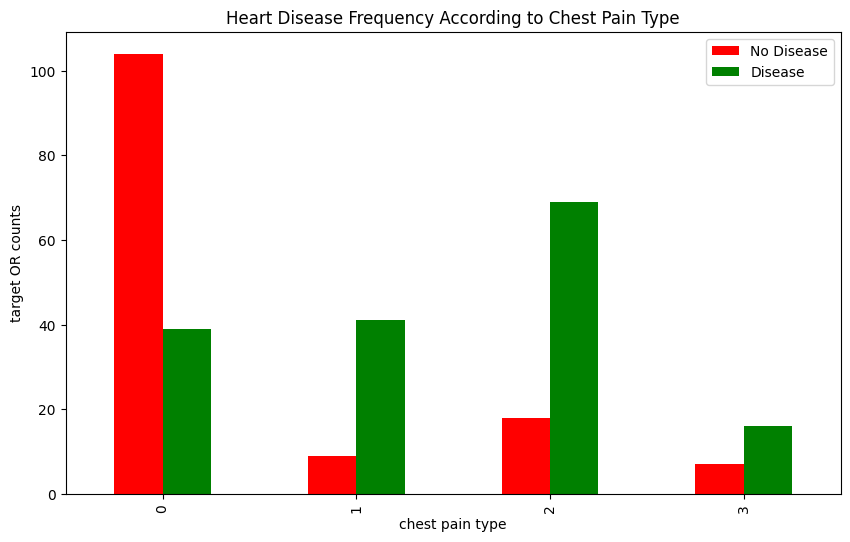

In [ ]:
# make the bar chart chest pain type vs target
pd.crosstab(heasrt_disease.cp,heasrt_disease.target).plot(kind='bar',
                                                           figsize=(10,6),
                                                           color=['red','green'])
# make some description of bar chart
plt.xlabel("chest pain type")
plt.ylabel("target OR counts")
plt.title("Heart Disease Frequency According to Chest Pain Type")
plt.legend(["No Disease", "Disease"])
plt.show()

**Correlation:** how to relate feature each other

(+) postive correlation (mean one feature is maximum then other feature is maximum Like Friend )

(-) negative correlation (mean one feature is maximum then other feature is minimum Like Enemy )

(
  1) correlation one feature is relation to itself

In [ ]:
heasrt_disease.corr()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


****Ploting the Correlation:**

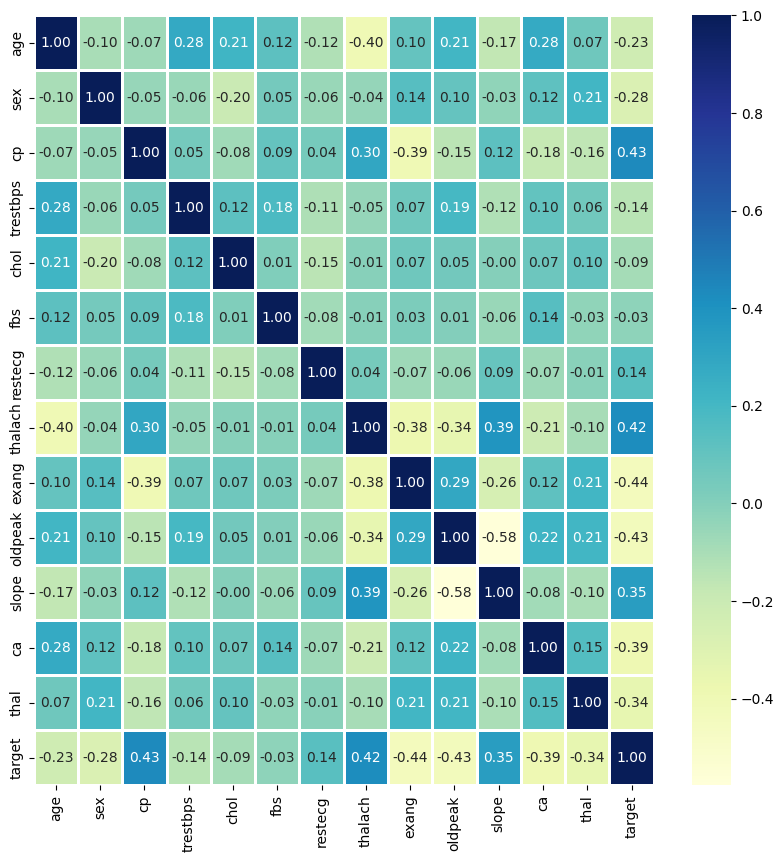

In [ ]:
corr_map = heasrt_disease.corr()

home,room = plt.subplots(figsize=(10,10))
room = sns.heatmap(corr_map,annot=True,
                   linewidths=1,
                   fmt='0.2f',
                   cmap='YlGnBu');
plt.show()

**split the data**

In [ ]:
heasrt_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# split the feature and target
X = heasrt_disease.drop('target',axis=1)
y = heasrt_disease['target']

In [ ]:
# split the data into train and test

# using random seed so that other could produce the same results
np.random.seed(7)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)



In [ ]:
len(X)

303

In [ ]:
len(X_train)

242

**Model:**
we are going to apply on data

1.K_Nearest Neighbour classifier

2.Random Forest classifier

3.logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

models= {'KNN':KNeighborsClassifier(),
         'Random Forest':RandomForestClassifier(),
         'logistic regression':LogisticRegression()}

def fit_and_score(models,X_train,X_test,y_train,y_test):
  np.random.seed(7)

  # make the dictionary to store the score
  model_score = {}
  # using the looping through
  for name,model in models.items(): # Changed .item() to .items()
       model.fit(X_train,y_train)
       # Evaluting the model and append it score
       model_score[name] = model.score(X_test,y_test)
  return model_score






In [ ]:
model_score = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)
model_score

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'KNN': 0.6885245901639344,
 'Random Forest': 0.819672131147541,
 'logistic regression': 0.8852459016393442}

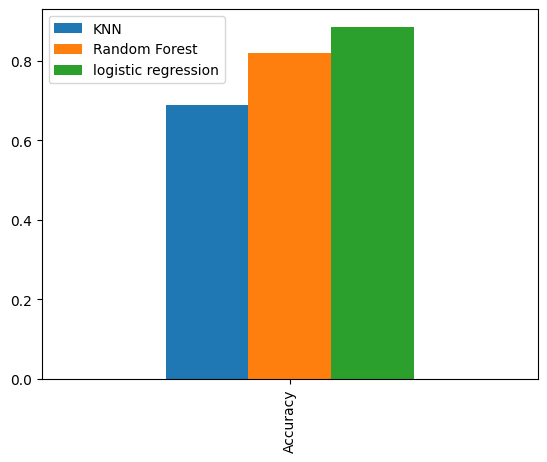

In [ ]:
model_compare = pd.DataFrame(model_score,index=['Accuracy'])
model_compare.plot.bar();

**Improving the Model:**

Universal method used for classificaton probelm



1.Hyperparameter tuning

2.features improving advanced level

3.confusion matrix

4.Cross validation

5.precision

6.recall

7.F1

8.classification report

9.roc curve

10.auc curve

In [ ]:
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
train_score = []
test_score = []

# create range to test to set neighbours
kneighbours = range(1,30)

knn = KNeighborsClassifier()
# using loop
for i in kneighbours:
  knn.set_params(n_neighbors=i)
  knn.fit(X_train,y_train)
  train_score.append(knn.score(X_train,y_train))
  test_score.append(knn.score(X_test,y_test))

In [ ]:
train_score

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058,
 0.6859504132231405,
 0.6694214876033058,
 0.7024793388429752,
 0.6735537190082644,
 0.6983471074380165,
 0.6942148760330579,
 0.6983471074380165,
 0.6859504132231405,
 0.6818181818181818]

In [ ]:
test_score

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361,
 0.7213114754098361,
 0.7049180327868853,
 0.7213114754098361]

Max KNN score is 0.7540983606557377


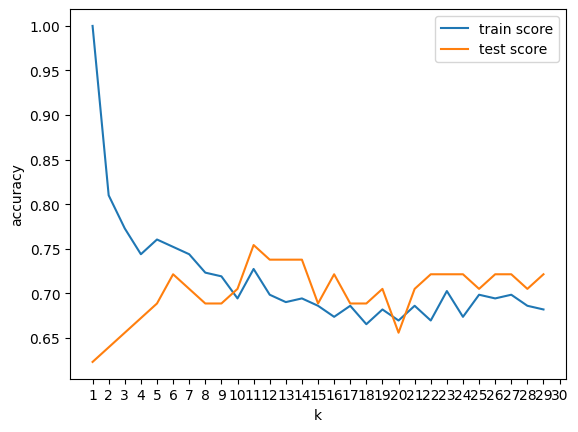

In [ ]:
plt.plot(kneighbours,train_score,label='train score')
plt.plot(kneighbours,test_score,label='test score')
plt.xticks(np.arange(1,31,1))
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend();
print(f'Max KNN score is {max(test_score)}')

In [ ]:
print(f'Max KNN score is {max(test_score)}')

Max KNN score is 0.7540983606557377
